# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
pip install citipy

     |████████████████████████████████| 563kB 503kB/s eta 0:00:01
  Created wheel for citipy: filename=citipy-0.0.5-cp37-none-any.whl size=559703 sha256=79c9b102b2479aae70e16feba75fa918aa022f7a41007524dcae7011930fcaf2
  Stored in directory: /Users/xier/Library/Caches/pip/wheels/6f/07/0d/0392639cf1c10376f59decd06775c0e085ca2458c6036c1028
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
#URL for GET requests to retrive weather data by cities name 
url = "https://api.openweathermap.org/data/2.5/weather?units=imperial"

In [10]:
# Build query URL
base_url = url + "&" + "appid=" + api_key + "&q=" 

In [11]:
#to set starter
index_code = 0
counter = 1
set_code = 1
city_weather = []

In [12]:
print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    query_url = base_url + city
    response = requests.get(query_url).json()
    print(query_url)
    try:
        city_weather.append([response['name'],response['clouds']['all'],response['sys']['country'],response['dt'],\
                           response['main']['humidity'],response['coord']['lon'],response['coord']['lat'],\
                             response['main']['temp_max'],response['wind']['speed']])
        print(f"Processing Record {index_code} of Set {set_code} | {city}")
        index_code += 1
        counter += 1   
    except KeyError:
        print("City not found. Skipping...")
    if index_code == 50: 
        set_code +=1 
        #reset
        index_code = 0
        counter = 1
print("-----------------------------")    
print("Data Retrieval Complete ")        

Beginning Data Retrieval
-----------------------------
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=dolna banjica
Processing Record 0 of Set 1 | dolna banjica
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=tabiauea
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=biak
Processing Record 1 of Set 1 | biak
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=meulaboh
Processing Record 2 of Set 1 | meulaboh
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=bestobe
Processing Record 3 of Set 1 | bestobe
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=bluff
Processing Record 4 of Set 1 | bluff
https://api.openweathermap.org/data/2.5/weath

https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=alta floresta
Processing Record 49 of Set 1 | alta floresta
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=busselton
Processing Record 0 of Set 2 | busselton
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=flinders
Processing Record 1 of Set 2 | flinders
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=vaitupu
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=ribeira grande
Processing Record 2 of Set 2 | ribeira grande
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=kuche
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1a

https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=katobu
Processing Record 47 of Set 2 | katobu
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=sentyabrskiy
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=sitka
Processing Record 48 of Set 2 | sitka
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=aklavik
Processing Record 49 of Set 2 | aklavik
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=faanui
Processing Record 0 of Set 3 | faanui
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=dunedin
Processing Record 1 of Set 3 | dunedin
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=b

https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=okhotsk
Processing Record 45 of Set 3 | okhotsk
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=new norfolk
Processing Record 46 of Set 3 | new norfolk
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=luanda
Processing Record 47 of Set 3 | luanda
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=brookhaven
Processing Record 48 of Set 3 | brookhaven
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=piacabucu
Processing Record 49 of Set 3 | piacabucu
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=surgut
Processing Record 0 of Set 4 | surgut
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6a

https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=shimoda
Processing Record 45 of Set 4 | shimoda
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=brunsbuttel
Processing Record 46 of Set 4 | brunsbuttel
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=illoqqortoormiut
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=arroio grande
Processing Record 47 of Set 4 | arroio grande
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=tura
Processing Record 48 of Set 4 | tura
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=provideniya
Processing Record 49 of Set 4 | provideniya
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=

https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=sobolevo
Processing Record 42 of Set 5 | sobolevo
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=prince albert
Processing Record 43 of Set 5 | prince albert
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=byron bay
Processing Record 44 of Set 5 | byron bay
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=jatai
Processing Record 45 of Set 5 | jatai
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=vengerovo
Processing Record 46 of Set 5 | vengerovo
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=nanortalik
Processing Record 47 of Set 5 | nanortalik
https://api.openweathermap.org/data/2.5/weather?units=imperial&a

https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=labelle
Processing Record 43 of Set 6 | labelle
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=cap malheureux
Processing Record 44 of Set 6 | cap malheureux
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=nome
Processing Record 45 of Set 6 | nome
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=fairbanks
Processing Record 46 of Set 6 | fairbanks
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=tumannyy
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=chengmai
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8

https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=alvaraes
Processing Record 39 of Set 7 | alvaraes
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=kedougou
Processing Record 40 of Set 7 | kedougou
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=cacoal
Processing Record 41 of Set 7 | cacoal
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=roura
Processing Record 42 of Set 7 | roura
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=mount isa
Processing Record 43 of Set 7 | mount isa
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=san cristobal
Processing Record 44 of Set 7 | san cristobal
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6

https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=ostrovnoy
Processing Record 40 of Set 8 | ostrovnoy
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=tiassale
Processing Record 41 of Set 8 | tiassale
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=fort nelson
Processing Record 42 of Set 8 | fort nelson
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=high rock
Processing Record 43 of Set 8 | high rock
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=nizhniy kuranakh
Processing Record 44 of Set 8 | nizhniy kuranakh
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=chinhoyi
Processing Record 45 of Set 8 | chinhoyi
https://api.openweathermap.org/data/2.5/weather?un

https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=mahuva
Processing Record 42 of Set 9 | mahuva
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=qasigiannguit
Processing Record 43 of Set 9 | qasigiannguit
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=ukiah
Processing Record 44 of Set 9 | ukiah
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=bambous virieux
Processing Record 45 of Set 9 | bambous virieux
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=acajutla
Processing Record 46 of Set 9 | acajutla
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=terney
Processing Record 47 of Set 9 | terney
https://api.openweathermap.org/data/2.5/weather?units=imperial&app

https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=ngunguru
Processing Record 41 of Set 10 | ngunguru
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=sept-iles
Processing Record 42 of Set 10 | sept-iles
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=havelock
Processing Record 43 of Set 10 | havelock
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=pangkalanbuun
Processing Record 44 of Set 10 | pangkalanbuun
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=moron
Processing Record 45 of Set 10 | moron
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=oranjestad
Processing Record 46 of Set 10 | oranjestad
https://api.openweathermap.org/data/2.5/weather?units=imperi

https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=kamenka
Processing Record 38 of Set 11 | kamenka
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=klaksvik
Processing Record 39 of Set 11 | klaksvik
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=salinopolis
Processing Record 40 of Set 11 | salinopolis
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=bandarbeyla
Processing Record 41 of Set 11 | bandarbeyla
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=suntar
Processing Record 42 of Set 11 | suntar
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=355a6af77cb06a1ac34fca9968db8f33&q=dakar
Processing Record 43 of Set 11 | dakar
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=3

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
weather_df = pd.DataFrame(city_weather)
weather_df.columns = ["City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max_Temp","Wind_Speed"]
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,Dolna Banjica,90,MK,1575791691,100,20.90,41.79,41.00,1.72
1,Biak,100,ID,1575791691,67,122.88,-0.91,85.53,6.67
2,Meulaboh,93,ID,1575791691,78,96.13,4.14,81.07,6.08
3,Bestobe,89,KZ,1575791692,89,73.10,52.50,29.70,13.53
4,Bluff,0,AU,1575791692,39,149.07,-23.58,83.52,19.35


In [14]:
#to get infor of the dataframe
weather_df.count()

City          551
Cloudiness    551
Country       551
Date          551
Humidity      551
Lat           551
Lng           551
Max_Temp      551
Wind_Speed    551
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

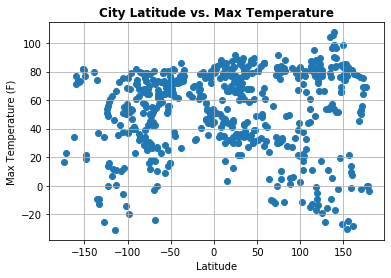

In [15]:
plt.scatter(weather_df['Lat'],weather_df['Max_Temp'],marker='o')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature",fontweight = 'bold')
plt.savefig("images/latitude_vs_max_temp.png")
plt.show()

#### Latitude vs. Humidity Plot

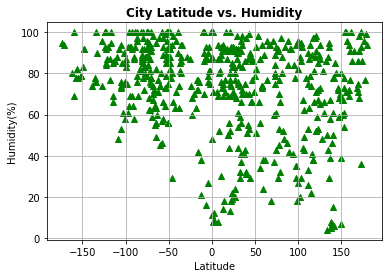

In [16]:
plt.scatter(weather_df['Lat'],weather_df['Humidity'],marker='^',color='g')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("City Latitude vs. Humidity",fontweight = 'bold')
plt.savefig("images/latitude_vs_humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

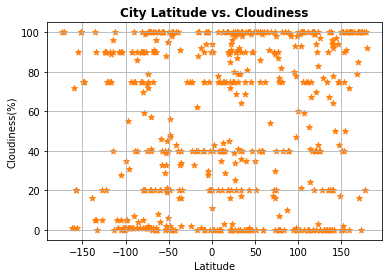

In [17]:
plt.scatter(weather_df['Lat'],weather_df['Cloudiness'],marker='*',color='tab:orange')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Latitude vs. Cloudiness",fontweight = 'bold')
plt.savefig("images/latitude_vs_cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

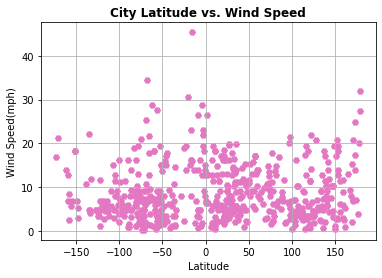

In [18]:
plt.scatter(weather_df['Lat'],weather_df['Wind_Speed'],marker='H',color='tab:pink')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title("City Latitude vs. Wind Speed",fontweight = 'bold')
plt.savefig("images/latitude_vs_wind_speed.png")
plt.show()

In [19]:
# save the Dataframe to csv file 
weather_df.to_csv(output_data_file)

In [20]:
weather_df.columns

Index(['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng',
       'Max_Temp', 'Wind_Speed'],
      dtype='object')

#### Three Observations: 
    1. humidity decreases as latitude increases especially towards northern hemisphere. Cities approaching to equator have high humidity. 
    2. cloudiness seems not to be related to latitude. 
    3. most of maximum temperature of cities at equator are close to each other between 20-80 F. 